# Imitation and Statistical Modelling
## Control
## Zhurik Nikita, 4 year 6 group

In [31]:
import numpy as np
import scipy as sp
from scipy import stats

import sys
sys.path.append('../')

from utils import *
from BaseUniform.statmod1 import UniformDistribution

In [32]:
base_dist = UniformDistribution()

base_rv = np.array([0.245, 0.450, 0.750, 0.333, 0.812, 0.245, 0.418, 0.511,
                    0.633, 0.721, 0.780, 0.721, 0.121, 0.259, 0.475, 0.512])

### Task 1

Model random line walk with probability of $+1$ equal to $\frac{2}{3}$ and probability of $-1$ equal to $\frac{1}{3}$.

This is done by replacing values of base RV $u$ with $1$ when $u \in \left[0; \frac{2}{3}\right)$ and with $-1$ when $u \in \left[\frac{2}{3}; 1\right)$. Then a cumulative sum is plotted.

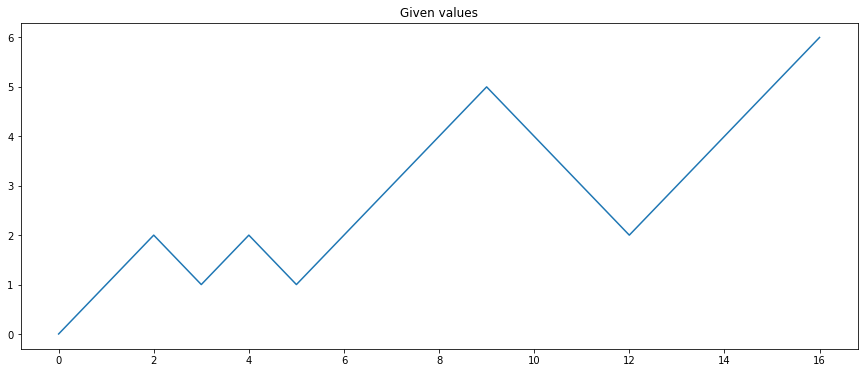

In [65]:
# Task 1. Model random walk with probas 2/3 for +1 and 1/3 for -1

# With values from population in the bottom:

plt.figure(figsize=(15, 6))

walking_probas = base_rv
walking_diffs = np.where(walking_probas >= 2/3, -1, 1)
plt.plot([0] + np.cumsum(walking_diffs).tolist())

plt.title('Given values')
plt.show()

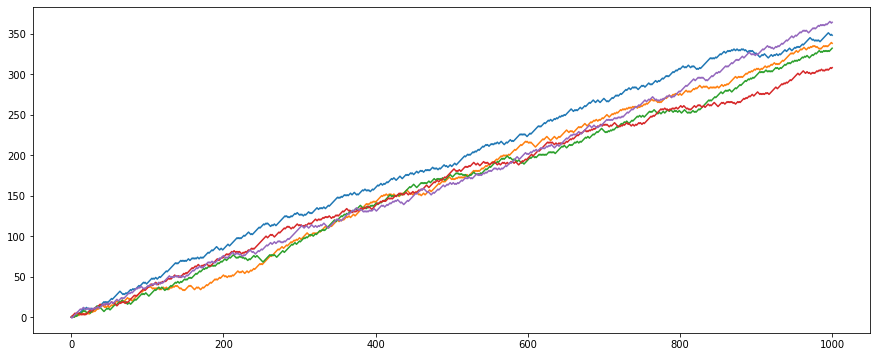

In [34]:
# With randomly generated population:

plt.figure(figsize=(15, 6))

for i in range(5):
    walking_probas = base_dist((1000,))
    walking_diffs = np.where(walking_probas >= 2/3, -1, 1)
    plt.plot([0] + np.cumsum(walking_diffs).tolist())
    
plt.title('Generated values')
plt.show()

### Task 2

Model Markov chain with states $C = \begin{bmatrix}-1 & 1\end{bmatrix}^T$, initial probabilities $\pi = \begin{bmatrix}\frac{1}{3} & \frac{2}{3}\end{bmatrix}^T$ and transfer probabilities $P = \begin{bmatrix}\frac{1}{2} & \frac{1}{2} \\ \frac{1}{3} & \frac{2}{3}\end{bmatrix}$.

This is performed by definition, we just select next state based on base RV value.

In [64]:
# Task 2. Model Markov chain

C = np.array([-1, 1])
pi = np.array([1/3, 2/3])
p = np.array([[0.5, 0.5],
              [1/3, 2/3]])

# With values from population in the bottom:

print('Given values')
print('Realization: ', end='')

value = C[int(base_rv[0] < pi[0])]
for i in range(3):
    print(f'{value:4d}', end=' ')
    value = C[int(base_rv[i + 1] < p[value, 0])]
print(f'{value:4d}')

# With randomly generated values:

print()
print('Generated values')
for i in range(5):
    print(f'{i}th realization: ', end='')
    value = C[int(base_dist() < pi[0])]
    for i in range(10):
        print(f'{value:4d}', end=' ')
        value = C[int(base_dist() < p[value, 0])]
    print(f'{value:4d}')

Given values
Realization:    1   -1   -1    1

Generated values
0th realization:    1   -1    1    1   -1   -1   -1   -1    1   -1    1
1th realization:    1    1   -1    1   -1    1   -1   -1   -1   -1   -1
2th realization:   -1   -1   -1   -1   -1   -1   -1   -1   -1    1   -1
3th realization:   -1   -1    1    1   -1    1   -1   -1   -1   -1   -1
4th realization:    1   -1    1   -1   -1    1   -1   -1   -1   -1   -1


### Task 3

Model exponentially-distributed RV
$$p(x) = e^{-(x-1)},\ x \in [1;+\infty)$$

This can be done using quantile function for exponential distribution and applying a shift:
$$F^{-1}(u) = -\frac{\ln{(1-u)}}{\lambda} + x_0$$

where $u \sim \mathcal{U}(0,1)$.

<ipython-input-97-8ffda1f8ea48>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


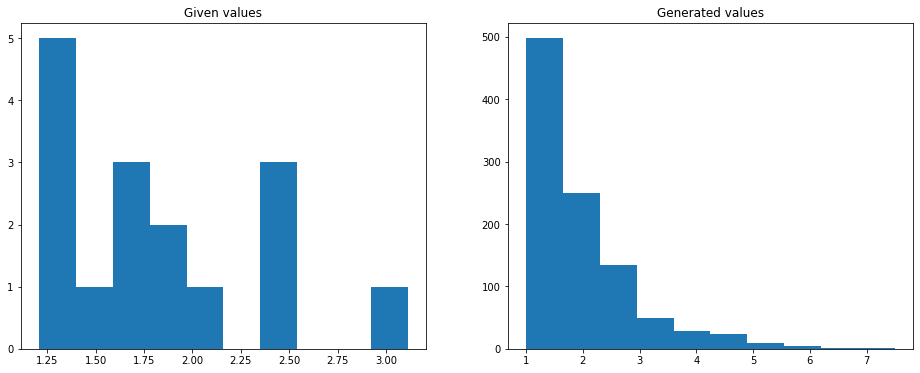

In [97]:
# Task 3. Model exponential rv

def get_exp(base, l=1, offset=0):
    return -np.log(base) / l + offset

# With values from population in the bottom:

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].hist(get_exp(base_rv, l=1, offset=1))
ax[0].set_title('Given values')

# With randomly generated values:

base_rv_population = base_dist((1000,))
ax[1].hist(get_exp(base_rv_population, l=1, offset=1))
ax[1].set_title('Generated values')

fig.show()

### Task 4

$$p(x, y) =
\begin{cases}
\frac{1}{\pi R^2}, (x-2)^2+(y-2)^2 \leq R^2, \\
0, otherwise
\end{cases}$$
where $R=2$.

Uniformly distributed vectors are generated via inverse transform sampling in polar coordinates. Then generated values are transformed to cartesian coordinates.

<ipython-input-62-7820affd1826>:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


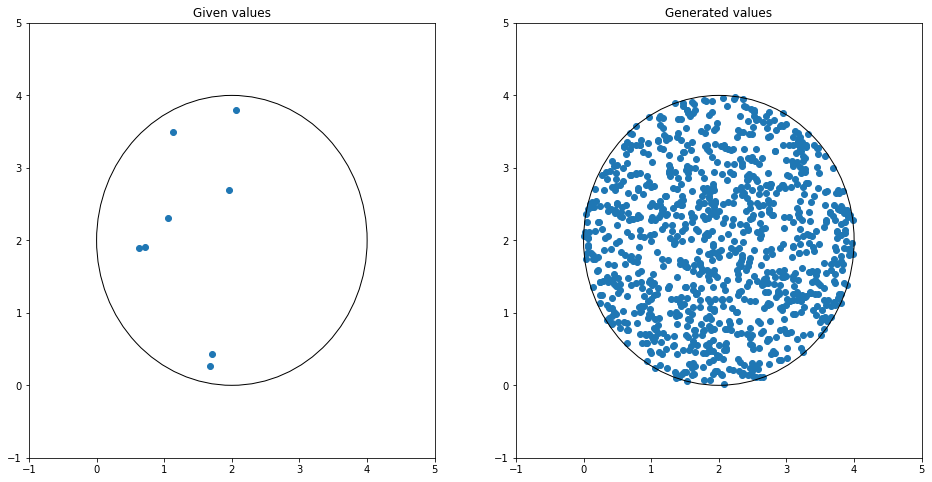

In [62]:
# Task 4. Model vector that is uniformly distributed inside a circle (x-2)^2 + (y-2)^2 <= 4

def generate_circle(base, x_offset=0, y_offset=0):
    base = base.reshape(-1, 2)
    r = 2 * np.sqrt(base[:, 0])
    phi = 2 * np.pi * base[:, 1]

    x = r * np.cos(phi) + x_offset
    y = r * np.sin(phi) + y_offset
    return np.vstack((x, y))

fig, ax = plt.subplots(1, 2, figsize=(16,8))

# With values from population in the bottom:

bottom_circle = generate_circle(base_rv.copy(), 2, 2)
ax[0].scatter(bottom_circle[0], bottom_circle[1])
ax[0].add_artist(plt.Circle((2, 2), 2, fill=False))
ax[0].set_xlim((-1, 5))
ax[0].set_ylim((-1, 5))
ax[0].set_title('Given values')

# With randomly generated values:

base_rv_population = base_dist((1000, 2))

circle = generate_circle(base_rv_population.copy(), 2, 2)
ax[1].scatter(circle[0], circle[1])
ax[1].add_artist(plt.Circle((2, 2), 2, fill=False))
ax[1].set_xlim((-1, 5))
ax[1].set_ylim((-1, 5))
ax[1].set_title('Generated values')

fig.show()

### Task 5

Calculate an integral using Monte-Carlo method and estimate error.

$$I = \int\limits_1^{+\infty} \frac{e^{-2x}(1+x^2)}{x^2}dx$$

This is done by substituting $$x = \tan{\left(\frac{\pi}{4}(t+1)\right)}$$

Then $$dx = \frac{\pi}{4}\frac{dt}{\cos^2{\left(\frac{\pi}{4}(t+1)\right)}}$$

And integral is $$I = \int\limits_0^1 \frac{e^{-2\tan{\left(\frac{\pi}{4}(t+1)\right)}}\left[1+\tan^2{\left(\frac{\pi}{4}(t+1)\right)}\right]}{\tan^2{\left(\frac{\pi}{4}(t+1)\right)}\cos^2{\left(\frac{\pi}{4}(t+1)\right)}}dt = \int\limits_0^1 \frac{e^{-2\tan{\left(\frac{\pi}{4}(t+1)\right)}}\left[1+\tan^2{\left(\frac{\pi}{4}(t+1)\right)}\right]}{\sin^2{\left(\frac{\pi}{4}(t+1)\right)}}dt$$

This integral is calculated using usual Monte-Carlo method with uniformly-distributed RV on $[0;1]$.

From central limit theorem and normal distribution quantiles follows that

$$ P\left(\left|\frac{1}{N}\sum_{i=0}^N \xi_i - I\right| \leq 3 \sqrt \frac{D\xi}{N}\right) \approx 0.9973 $$

So $3 \sqrt \frac{D\xi}{N}$ can be our theoretical error estimate with confidence of $0.9973$.

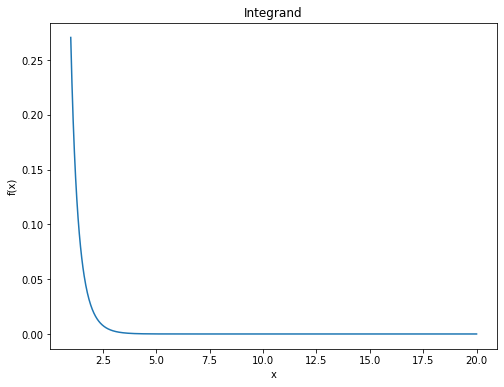

Given values integral: 0.08136679260693169
Generated values integral: 0.10451356804187441
Quadratudes: 0.1052019034387788

Theoretical error estimate: 0.06437589477136132
Absolute error: 0.02383511083184711
Relative error: 0.22656539523277464


In [99]:
integrand = lambda x: np.exp(-2 * x) * (1 + x ** 2) / x ** 2
tg_integrand = lambda t: (np.pi / 4
                          * np.exp(-2 * np.tan(np.pi / 4 * (t + 1)))
                          * (1 + np.tan(np.pi / 4 * (t + 1)) ** 2)
                          / np.sin(np.pi / 4 * (t + 1)) ** 2
                         )

plt.figure(figsize=(8, 6))
x_grid = np.linspace(1, 20, 1000)

plt.plot(x_grid, integrand(x_grid))
plt.title('Integrand')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

# With values from population in the bottom:

given_value = 1 / base_rv.size * np.sum(tg_integrand(base_rv))
print('Given values integral:', given_value)

# With randomly generated values:
base_rv_population = base_dist((1000,))
random_gen_value = 1 / base_rv_population.size * np.sum(tg_integrand(base_rv_population))
print('Generated values integral:', random_gen_value)

from scipy.integrate import quad

midpoint = 5
true_value = quad(integrand, 1, midpoint)[0] + quad(integrand, midpoint, np.inf)[0]

print('Quadratudes:', true_value)

print()

print('Theoretical error estimate:', 3 * (np.var(tg_integrand(base_rv)) / base_rv.size)**0.5)
print('Absolute error:', np.abs(true_value - given_value))
print('Relative error:', np.abs((true_value - given_value) / true_value))